<a href="https://colab.research.google.com/github/Shriniwas18K/Mini-Projects/blob/main/computer%20vision%20and%20deep%20learning/INTERN_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face detection with bounding box labelled as blur or clear

# 1) Find open source solutions


Currently such direct open source solution might be under development. These are two diffirent tasks face detection(object detection) and image classification , so open source solutions were found seprately for both of them diffirently. The code of using them is below.

# 2) Find public datasets about the topic


The task requires faces datasets. Found mostly the VGG2face , widerface , celebA datasets from kaggle , hugging face , roboflow , and github.
##### 1)https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
##### 2)https://www.kaggle.com/datasets/dataturks/face-detection-in-images
##### 3)https://github.com/ox-vgg/vgg_face2

Directly annotated datasets werent available because topic is combination of two tasks. So we will create one dataset for us.

# 3) Test repositories and run their code

### Install requirements : ultralytics and yolov8n.pt

In [1]:
! pip install --quiet ultralytics

! wget https://github.com/lindevs/yolov8-face/releases/latest/download/yolov8n-face-lindevs.pt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.2 MB/s eta 0:00:00
--2025-03-29 10:54:54--  https://github.com/lindevs/yolov8-face/releases/latest/download/yolov8n-face-lindevs.pt
Resolving

## yolo v8 hugging face
### https://huggingface.co/arnabdhar/YOLOv8-Face-Detection

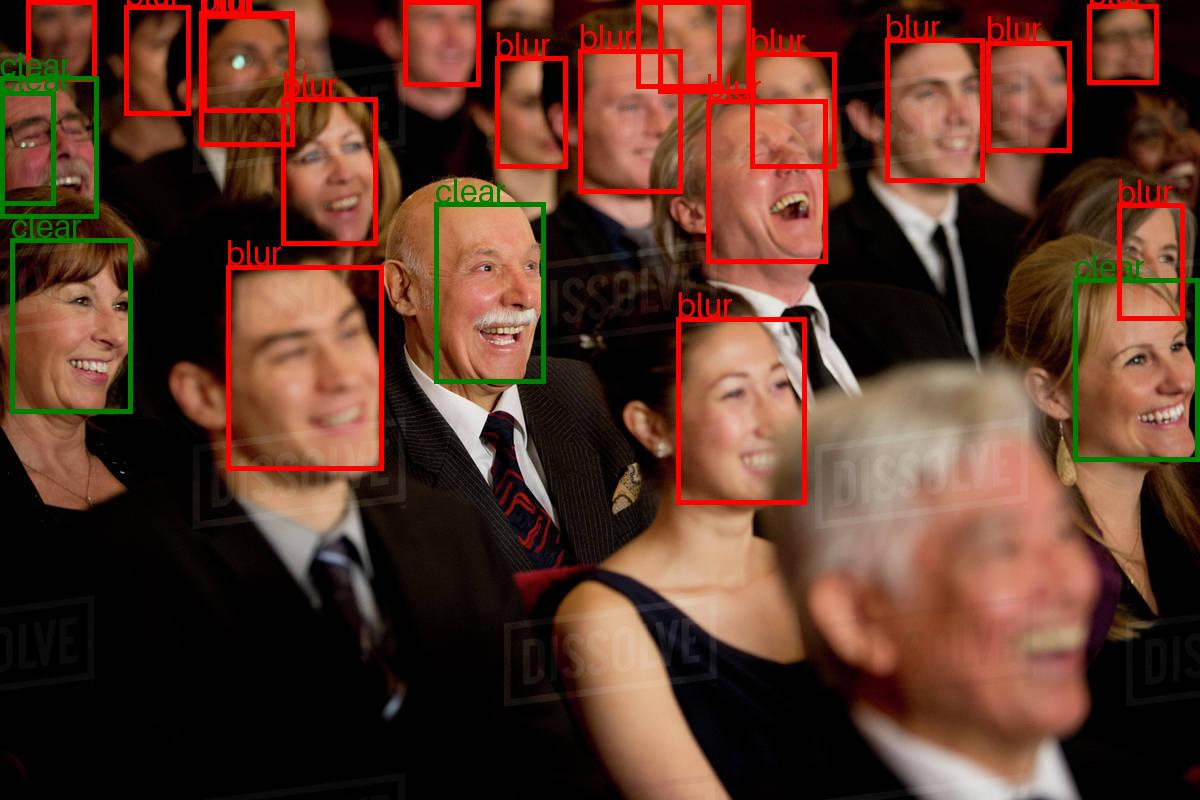

In [2]:
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from huggingface_hub import hf_hub_download
import cv2
import numpy as np

# Load YOLO model for face detection
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")
face_model = YOLO(model_path)

# Function to crop image based on bounding box
def crop_image(image_path, bbox):
    image = Image.open(image_path)
    cropped = image.crop((bbox[0], bbox[1], bbox[2], bbox[3]))
    return np.array(cropped)  # Convert to NumPy array for OpenCV processing

# Function to classify blur using Laplacian variance
def classify_blur(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return "clear" if laplacian_var > threshold else "blur"

# Function to draw labeled bounding boxes on the image
def draw_bounding_boxes(image_path, results, classifications):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default(size=32)

    for idx, result in enumerate(results):
        for bbox, label in zip(result.boxes.xyxy, classifications[idx]):
            bbox = bbox.numpy()
            draw.rectangle([bbox[0], bbox[1], bbox[2], bbox[3]], outline="red" if label=="blur" else "green", width=5)
            draw.text((bbox[0], bbox[1] - 32), label, fill="red" if label=="blur" else "green", font=font)
    return image

# Detect faces in the image
image_path = "sample_task.jpg"
results = face_model.predict(image_path, save=False)

# Iterate through detected faces and classify them
classifications = []
for result in results:
    result_classifications = []
    for bbox in result.boxes.xyxy:  # Get bounding box coordinates
        cropped_face = crop_image(image_path, bbox.numpy())  # Crop detected face
        label = classify_blur(cropped_face)  # Classify blur
        result_classifications.append(label)
    classifications.append(result_classifications)

# Draw bounding boxes and save the labeled image
labeled_image = draw_bounding_boxes(image_path, results, classifications)
labeled_image.save("labeled_image_yolo_hugging_face.jpg")

print("Image saved with labeled bounding boxes.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pt:   0%|          | 0.00/6.25M [00:00<?, ?B/s]


image 1/1 /content/sample_task.jpg: 448x640 23 FACEs, 403.0ms
Speed: 17.3ms preprocess, 403.0ms inference, 39.3ms postprocess per image at shape (1, 3, 448, 640)
Image saved with labeled bounding boxes.


## yolo from github lindev
### https://github.com/lindevs/yolov8-face?tab=readme-ov-file

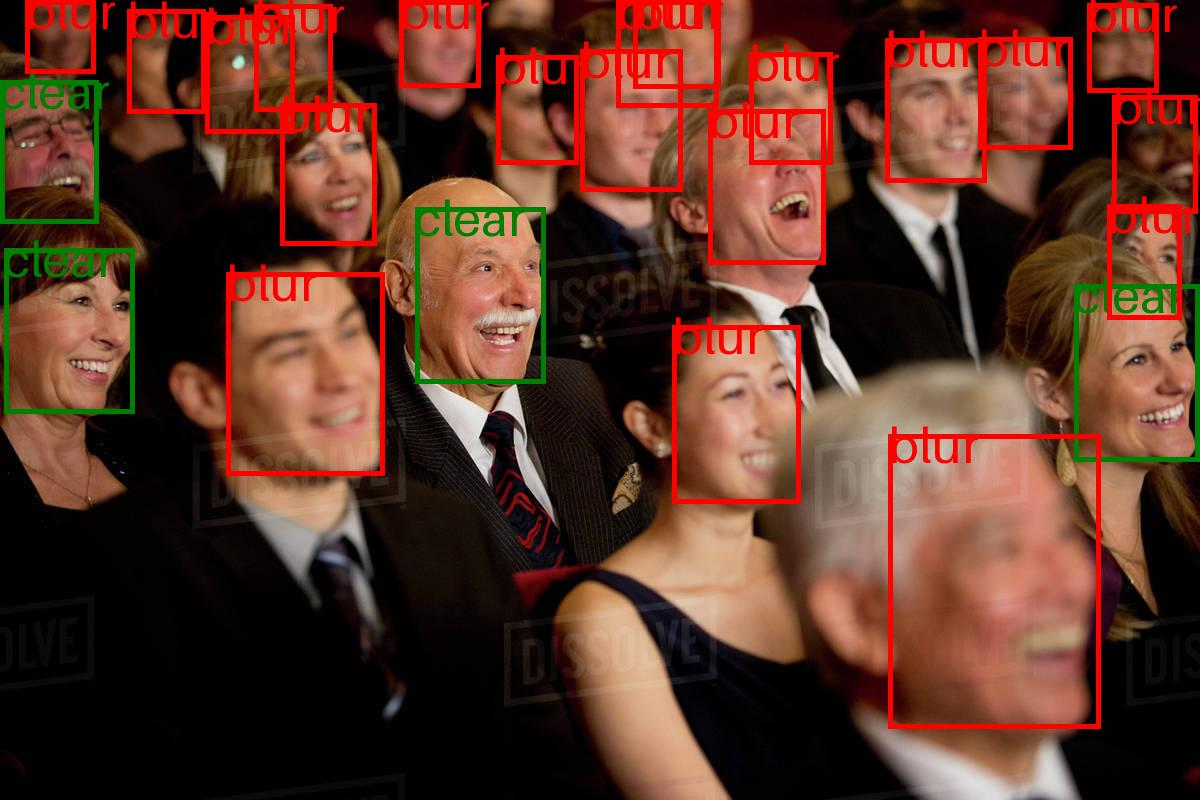

In [3]:
import requests
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Step 1: Download the YOLOv8 Face Model
model_path = "yolov8n-face-lindevs.pt"  # Save the model locally

# Step 2: Load the YOLO Model
face_model = YOLO(model_path)

# Step 3: Function to classify blur using Laplacian variance
def classify_blur(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return "clear" if laplacian_var > threshold else "blur"

# Step 4: Function to crop the face based on bounding box coordinates
def crop_image(image, bbox):
    x1, y1, x2, y2 = [int(coord) for coord in bbox]
    cropped = image[y1:y2, x1:x2]
    return cropped

# Step 5: Function to draw bounding boxes with labels
def draw_bounding_boxes(image, results, classifications):
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default(size=50)  # Ensure 'arial.ttf' is available

    for result, label in zip(results.boxes.xyxy, classifications):
        bbox = [int(coord) for coord in result]
        draw.rectangle([bbox[0], bbox[1], bbox[2], bbox[3]], outline="red" if label=="blur" else "green", width=5)
        draw.text((bbox[0], bbox[1] - 20), label, fill="red" if label=="blur" else "green", font=font)
    return image

# Step 6: Detect faces in the image and classify blur
image_path = "sample_task.jpg"
image = cv2.imread(image_path)

results = face_model.predict(image_path, save=False)

# Classify blur for each detected face
classifications = []
for bbox in results[0].boxes.xyxy:  # Access bounding boxes from detection results
    cropped_face = crop_image(image, bbox.numpy())  # Crop detected face
    label = classify_blur(cropped_face)  # Classify blur
    classifications.append(label)

# Step 7: Draw bounding boxes and labels
image_pil = Image.open(image_path)
labeled_image = draw_bounding_boxes(image_pil, results[0], classifications)

# Step 8: Save the labeled image
labeled_image.save("labeled_image_yolo_github.jpg")
print("Image saved with labeled bounding boxes.")


image 1/1 /content/sample_task.jpg: 448x640 24 faces, 246.1ms
Speed: 6.3ms preprocess, 246.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Image saved with labeled bounding boxes.


## Haar Cascade for annotations manually to create dataset

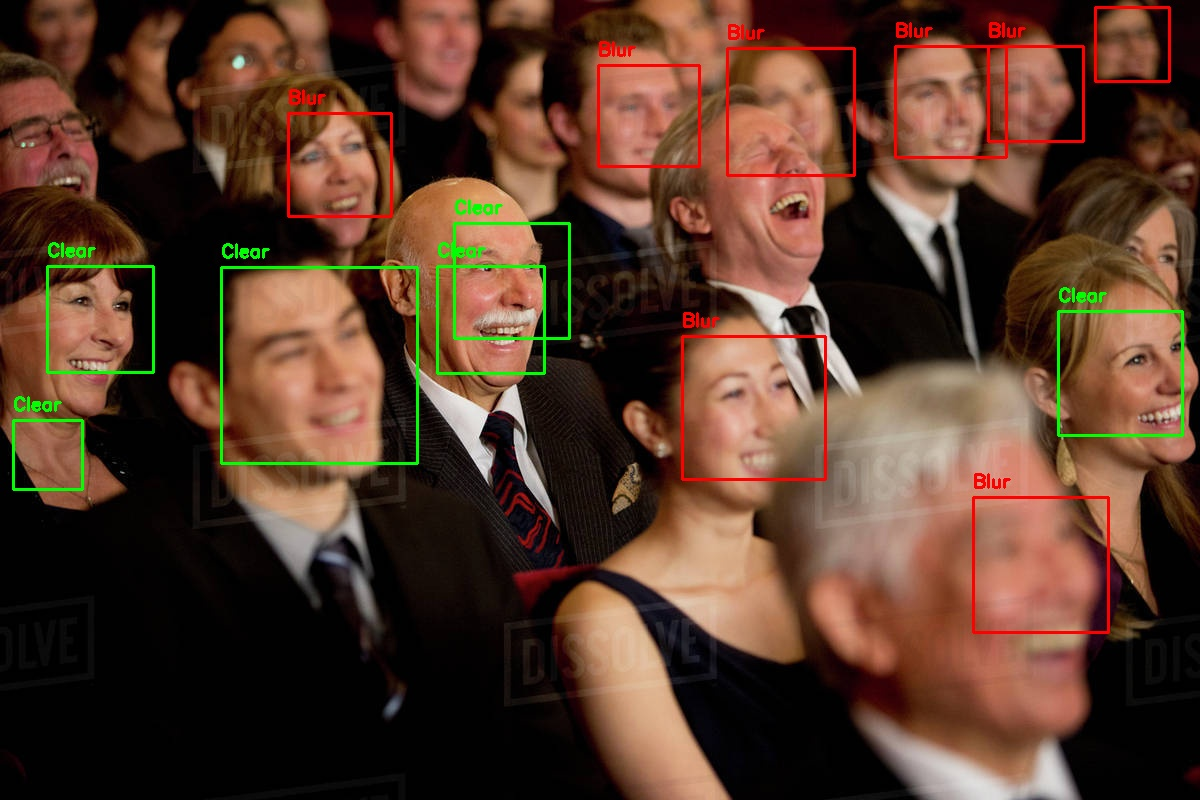

In [4]:
import cv2

# Load pre-trained face detection model (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_label_blur(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        face_region = gray[y:y+h, x:x+w]  # Crop face
        # Compute Laplacian variance
        laplacian_var = cv2.Laplacian(face_region, cv2.CV_64F).var()

        # Label based on blur threshold
        label = "Blur" if laplacian_var < 100 else "Clear"  # Adjust threshold if necessary

        # Draw bounding box
        color = (0, 0, 255) if label == "Blur" else (0, 255, 0)  # Red for Blur, Green for Clear
        cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)

        # Add label text
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.6
        thickness = 2
        cv2.putText(image, label, (x, y - 10), font, font_scale, color, thickness)

    # Save the labeled image
    cv2.imwrite(output_path, image)
    print(f"Image saved with labeled bounding boxes at {output_path}")

# Example usage
detect_and_label_blur("sample_task.jpg", "labeled_image_haar_cascade.jpg")

Image saved with labeled bounding boxes at labeled_image_haar_cascade.jpg


#### ip image : https://dissolve.com/stock-photo/People-smiling-laughing-theater-royalty-free-image/101-D985-10-702
#### Observations
#### Same image gave diffirent output at diffirent resolutions

#### distinctively at smaller resolutions images were misclassfied due to laplacian method

#### Manually upload this image as sample_task.jpg

# 4) Train the model


## Pre-training


### Using widerface dataset and manually annotating it using haarcascade approach.

In [5]:
# bring the yolov8-face model
!git clone https://github.com/lindevs/yolov8-face.git

# now remove the data directory and its contents
!rm -rf data

# Download the widerface validation set zip file
!wget https://huggingface.co/datasets/CUHK-CSE/wider_face/resolve/main/data/WIDER_val.zip

# Unzip the validation set
!unzip -q WIDER_val.zip -d WIDER_val

Cloning into 'yolov8-face'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 159 (delta 52), reused 141 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (159/159), 4.47 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (52/52), done.
--2025-03-29 10:55:22--  https://huggingface.co/datasets/CUHK-CSE/wider_face/resolve/main/data/WIDER_val.zip
Resolving huggingface.co (huggingface.co)... 3.166.152.105, 3.166.152.44, 3.166.152.65, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/datasets/wider_face/f9efbd09f28c5d2d884be8c0eaef3967158c866a593fc36ab0413e4b2a58a17a?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27WIDER_val.zip%3B+filename%3D%22WIDER_val.zip%22%3B&response-content-type=application%2Fzip&Expires=1743249322&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbm

### Pull some images outfrom it into dataset directory and annotate them with haar cascade method

In [6]:
import cv2
import os

def detect_faces_and_label(image_path, haar_cascade, threshold, output_dir, processed_images_dir):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces using Haar Cascade
    faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    height, width = gray.shape[:2]
    annotation_lines = []

    for (x, y, w, h) in faces:
        # Extract face region
        face_region = gray[y:y+h, x:x+w]

        # Calculate Laplacian variance
        laplacian_var = cv2.Laplacian(face_region, cv2.CV_64F).var()

        # Label face based on threshold
        class_id = 0 if laplacian_var < threshold else 1  # 0 for blurry, 1 for clear

        # Convert to YOLO format: class_id center_x center_y width height
        center_x = (x + w / 2) / width
        center_y = (y + h / 2) / height
        box_width = w / width
        box_height = h / height
        annotation_line = f"{class_id} {center_x:.6f} {center_y:.6f} {box_width:.6f} {box_height:.6f}"
        annotation_lines.append(annotation_line)

    # Save annotations to a .txt file
    image_name = os.path.basename(image_path)
    annotation_filename = os.path.splitext(image_name)[0] + ".txt"
    annotation_path = os.path.join(output_dir, annotation_filename)

    with open(annotation_path, "w") as f:
        f.write("\n".join(annotation_lines))

    # Save processed image
    processed_image_path = os.path.join(processed_images_dir, image_name)
    cv2.imwrite(processed_image_path, image)

    print(f"Processed: {image_name}, Faces Detected: {len(faces)}")

def process_dataset(dataset_dir, output_dir, processed_images_dir, haar_cascade_path, threshold, max_images):
    # Load Haar Cascade
    haar_cascade = cv2.CascadeClassifier(haar_cascade_path)
    if haar_cascade.empty():
        print("Error: Haar Cascade file not found or invalid.")
        return

    # Ensure output directories exist
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(processed_images_dir, exist_ok=True)

    # Keep track of processed images count
    processed_count = 0

    # Process each image in the dataset
    for image_name in os.listdir(dataset_dir):
        if processed_count >= max_images:
            break

        image_path = os.path.join(dataset_dir, image_name)
        detect_faces_and_label(image_path, haar_cascade, threshold, output_dir, processed_images_dir)
        processed_count += 1

    print(f"Total images processed: {processed_count}")

# Define parameters
dataset_dir = "WIDER_val/WIDER_val/images"  # Path to WiderFace images
output_dir = "data/labels"                  # Path to store annotation files (YOLO format)
processed_images_dir = "data/images"        # Path to store processed images
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
threshold = 100.0


max_images = 1                       # Maximum images to process in each widerface directory


# Process the dataset, limiting to 1000 images
for directory in os.listdir(dataset_dir):
    process_dataset(os.path.join(dataset_dir, directory), output_dir, processed_images_dir, haar_cascade_path, threshold, max_images)

Processed: 1_Handshaking_Handshaking_1_209.jpg, Faces Detected: 0
Total images processed: 1
Processed: 61_Street_Battle_streetfight_61_22.jpg, Faces Detected: 2
Total images processed: 1
Processed: 33_Running_Running_33_517.jpg, Faces Detected: 7
Total images processed: 1
Processed: 53_Raid_policeraid_53_171.jpg, Faces Detected: 0
Total images processed: 1
Processed: 21_Festival_Festival_21_331.jpg, Faces Detected: 2
Total images processed: 1
Processed: 10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_447.jpg, Faces Detected: 1
Total images processed: 1
Processed: 13_Interview_Interview_Sequences_13_973.jpg, Faces Detected: 1
Total images processed: 1
Processed: 4_Dancing_Dancing_4_1026.jpg, Faces Detected: 5
Total images processed: 1
Processed: 19_Couple_Couple_19_514.jpg, Faces Detected: 1
Total images processed: 1
Processed: 20_Family_Group_Family_Group_20_739.jpg, Faces Detected: 3
Total images processed: 1
Processed: 52_Photographers_taketouristphotos_52_15

#### Upload the data_file.yaml manually
###### it contains
---------

train: ../data/images  # Path to the directory containing training images

val: ../data/images    # Path to validation images (same as training directory if not split)

nc: 2  # Number of classes (0 for blurry, 1 for clear)

names: ['blurry', 'clear']  # Class names

----------

## Training Model

In [7]:
! pip install --quiet -r yolov8-face/requirements.txt

In [8]:
! python yolov8-face/train.py --data data_file.yaml --weights yolov8n-face-lindevs.pt --epochs 1 --device cpu

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n-face-lindevs.pt, data=data_file.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

## Results

### PR curve


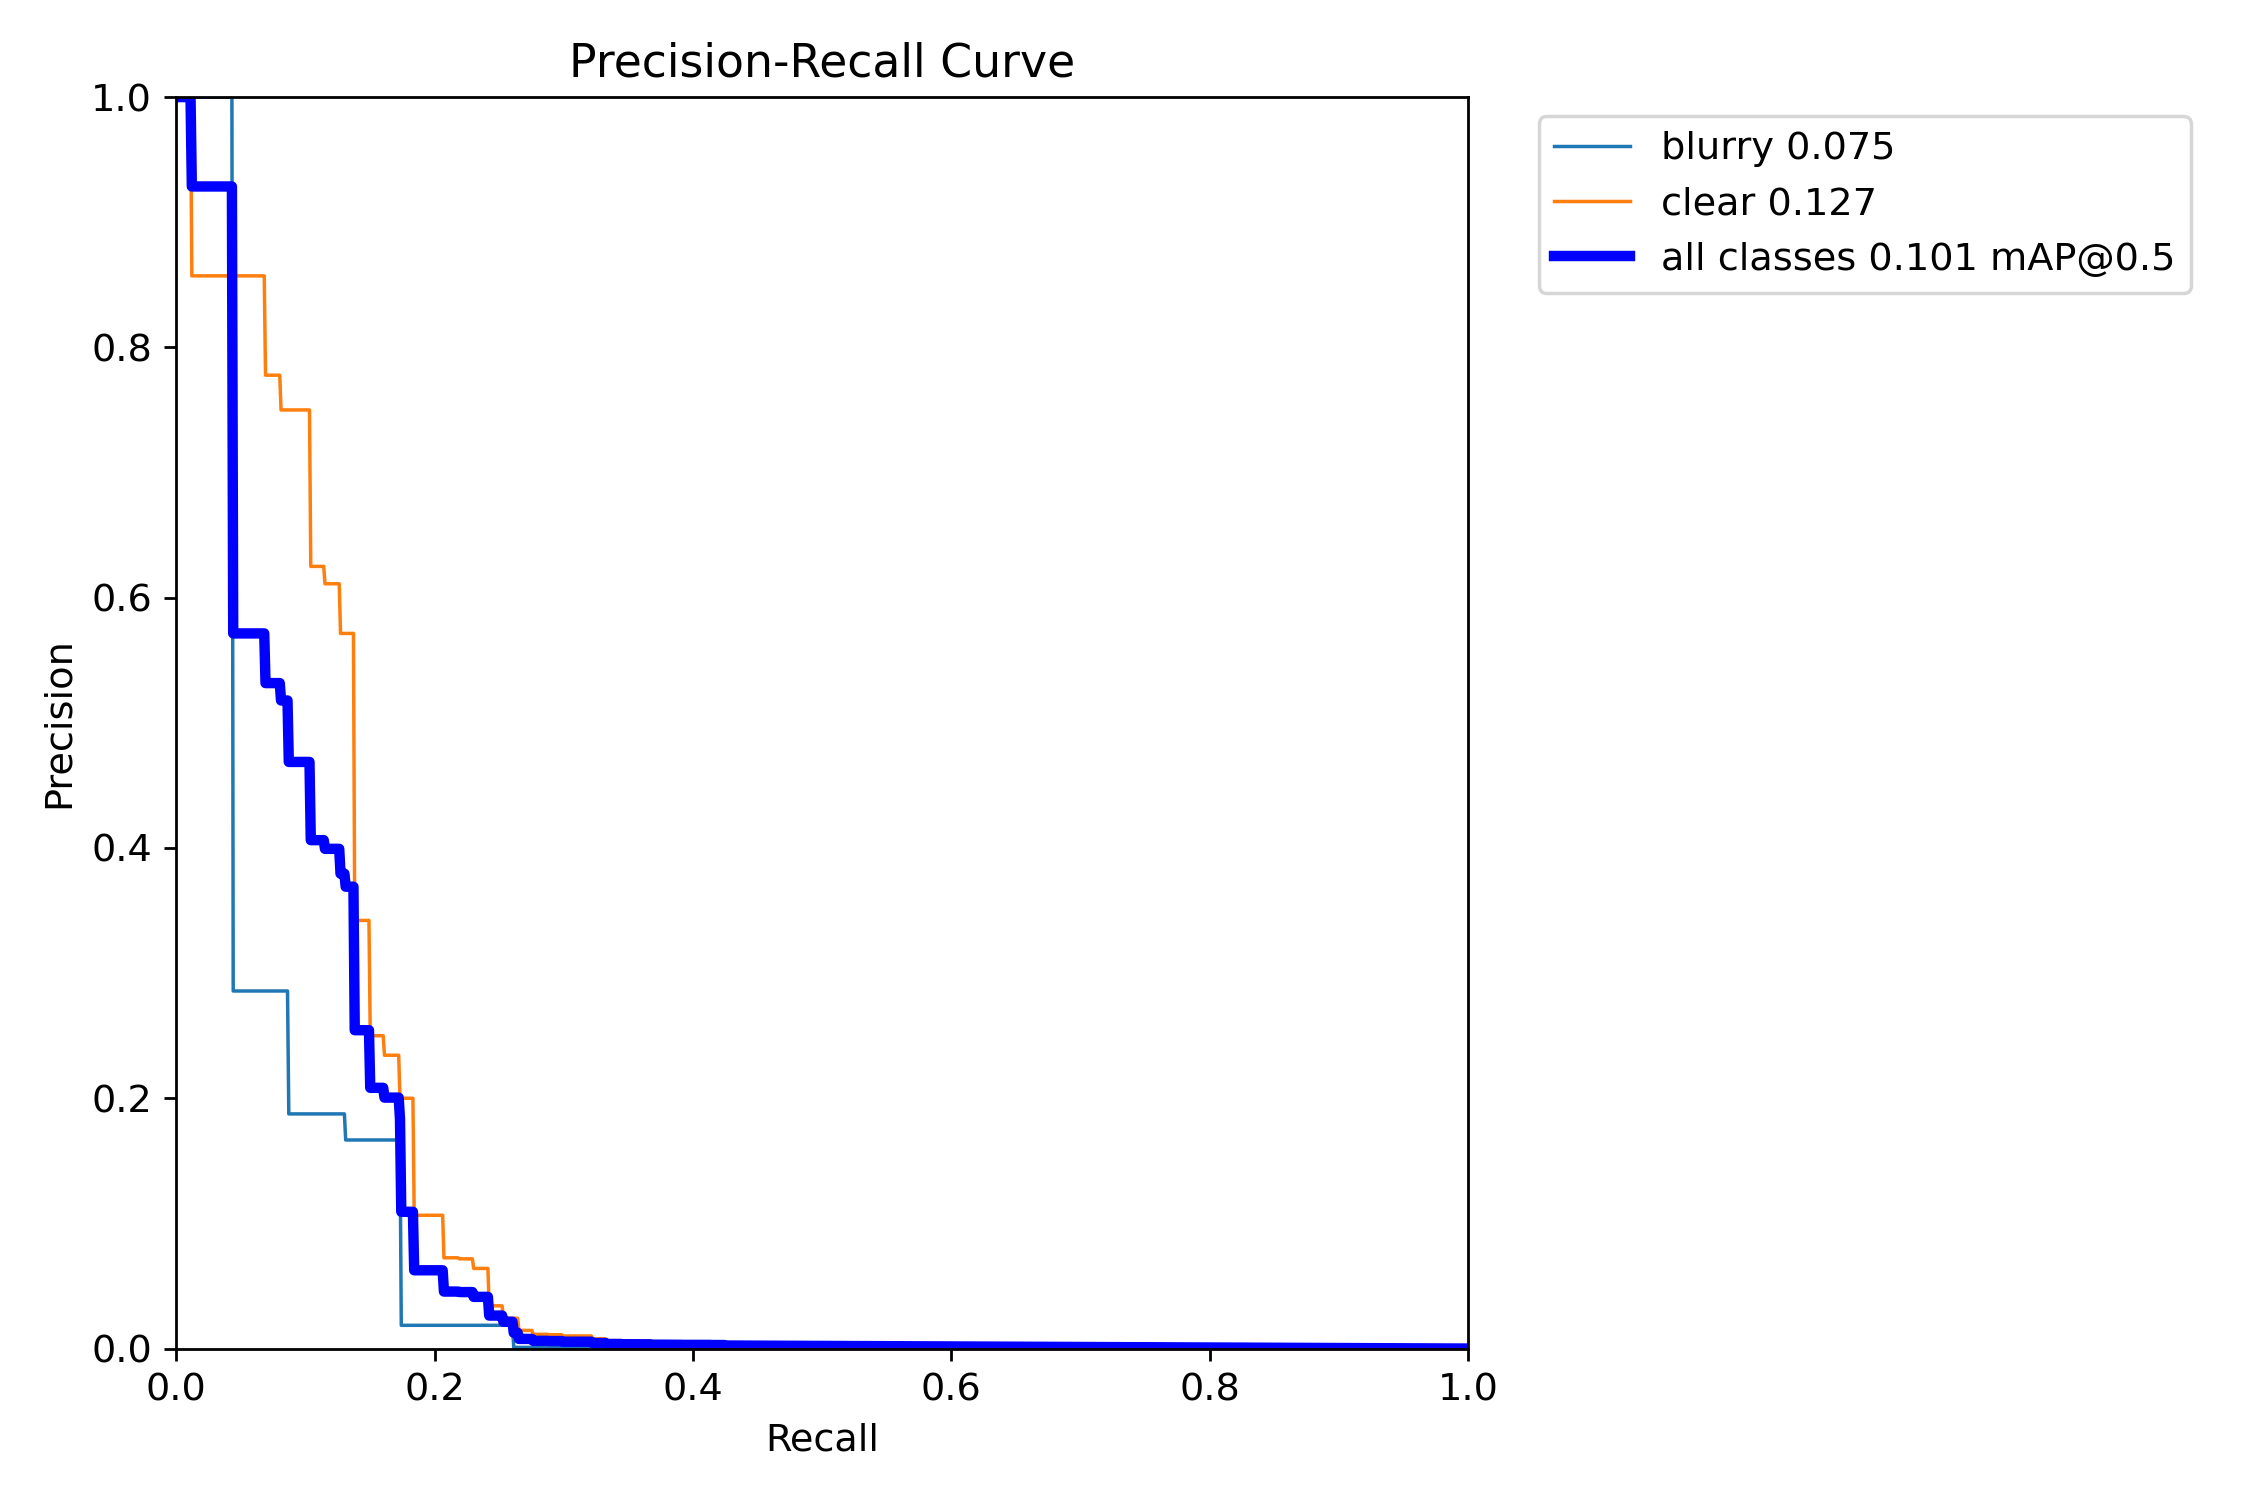

### PC curve


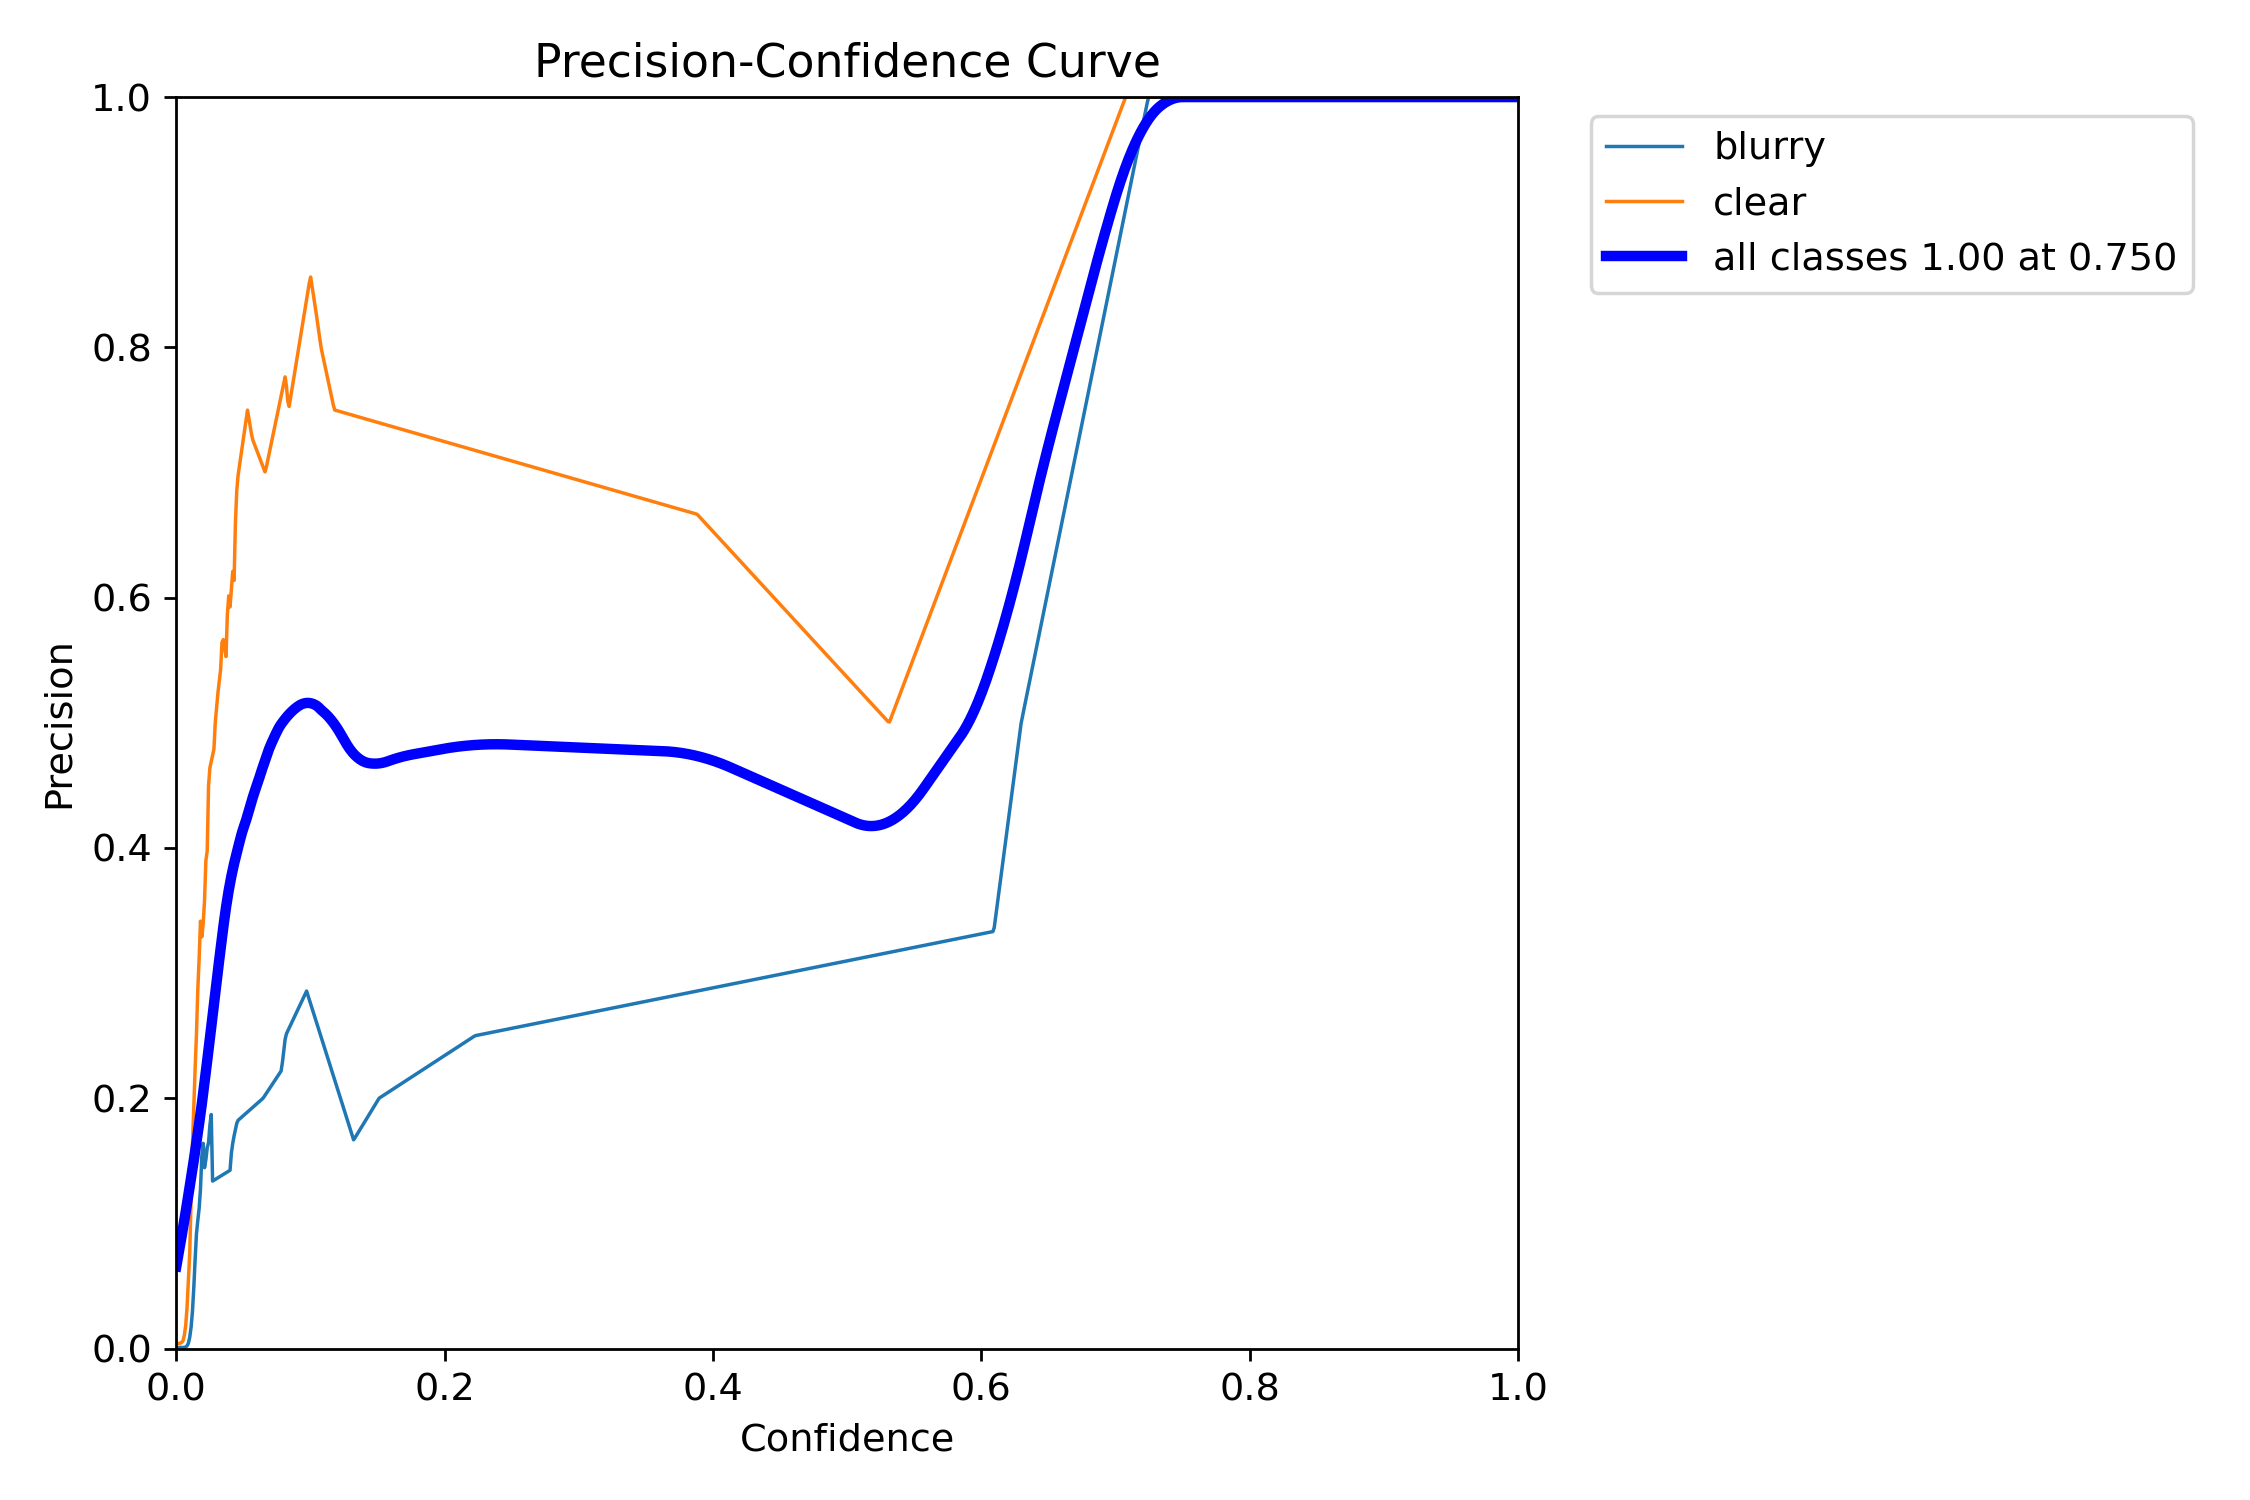

### RC curve


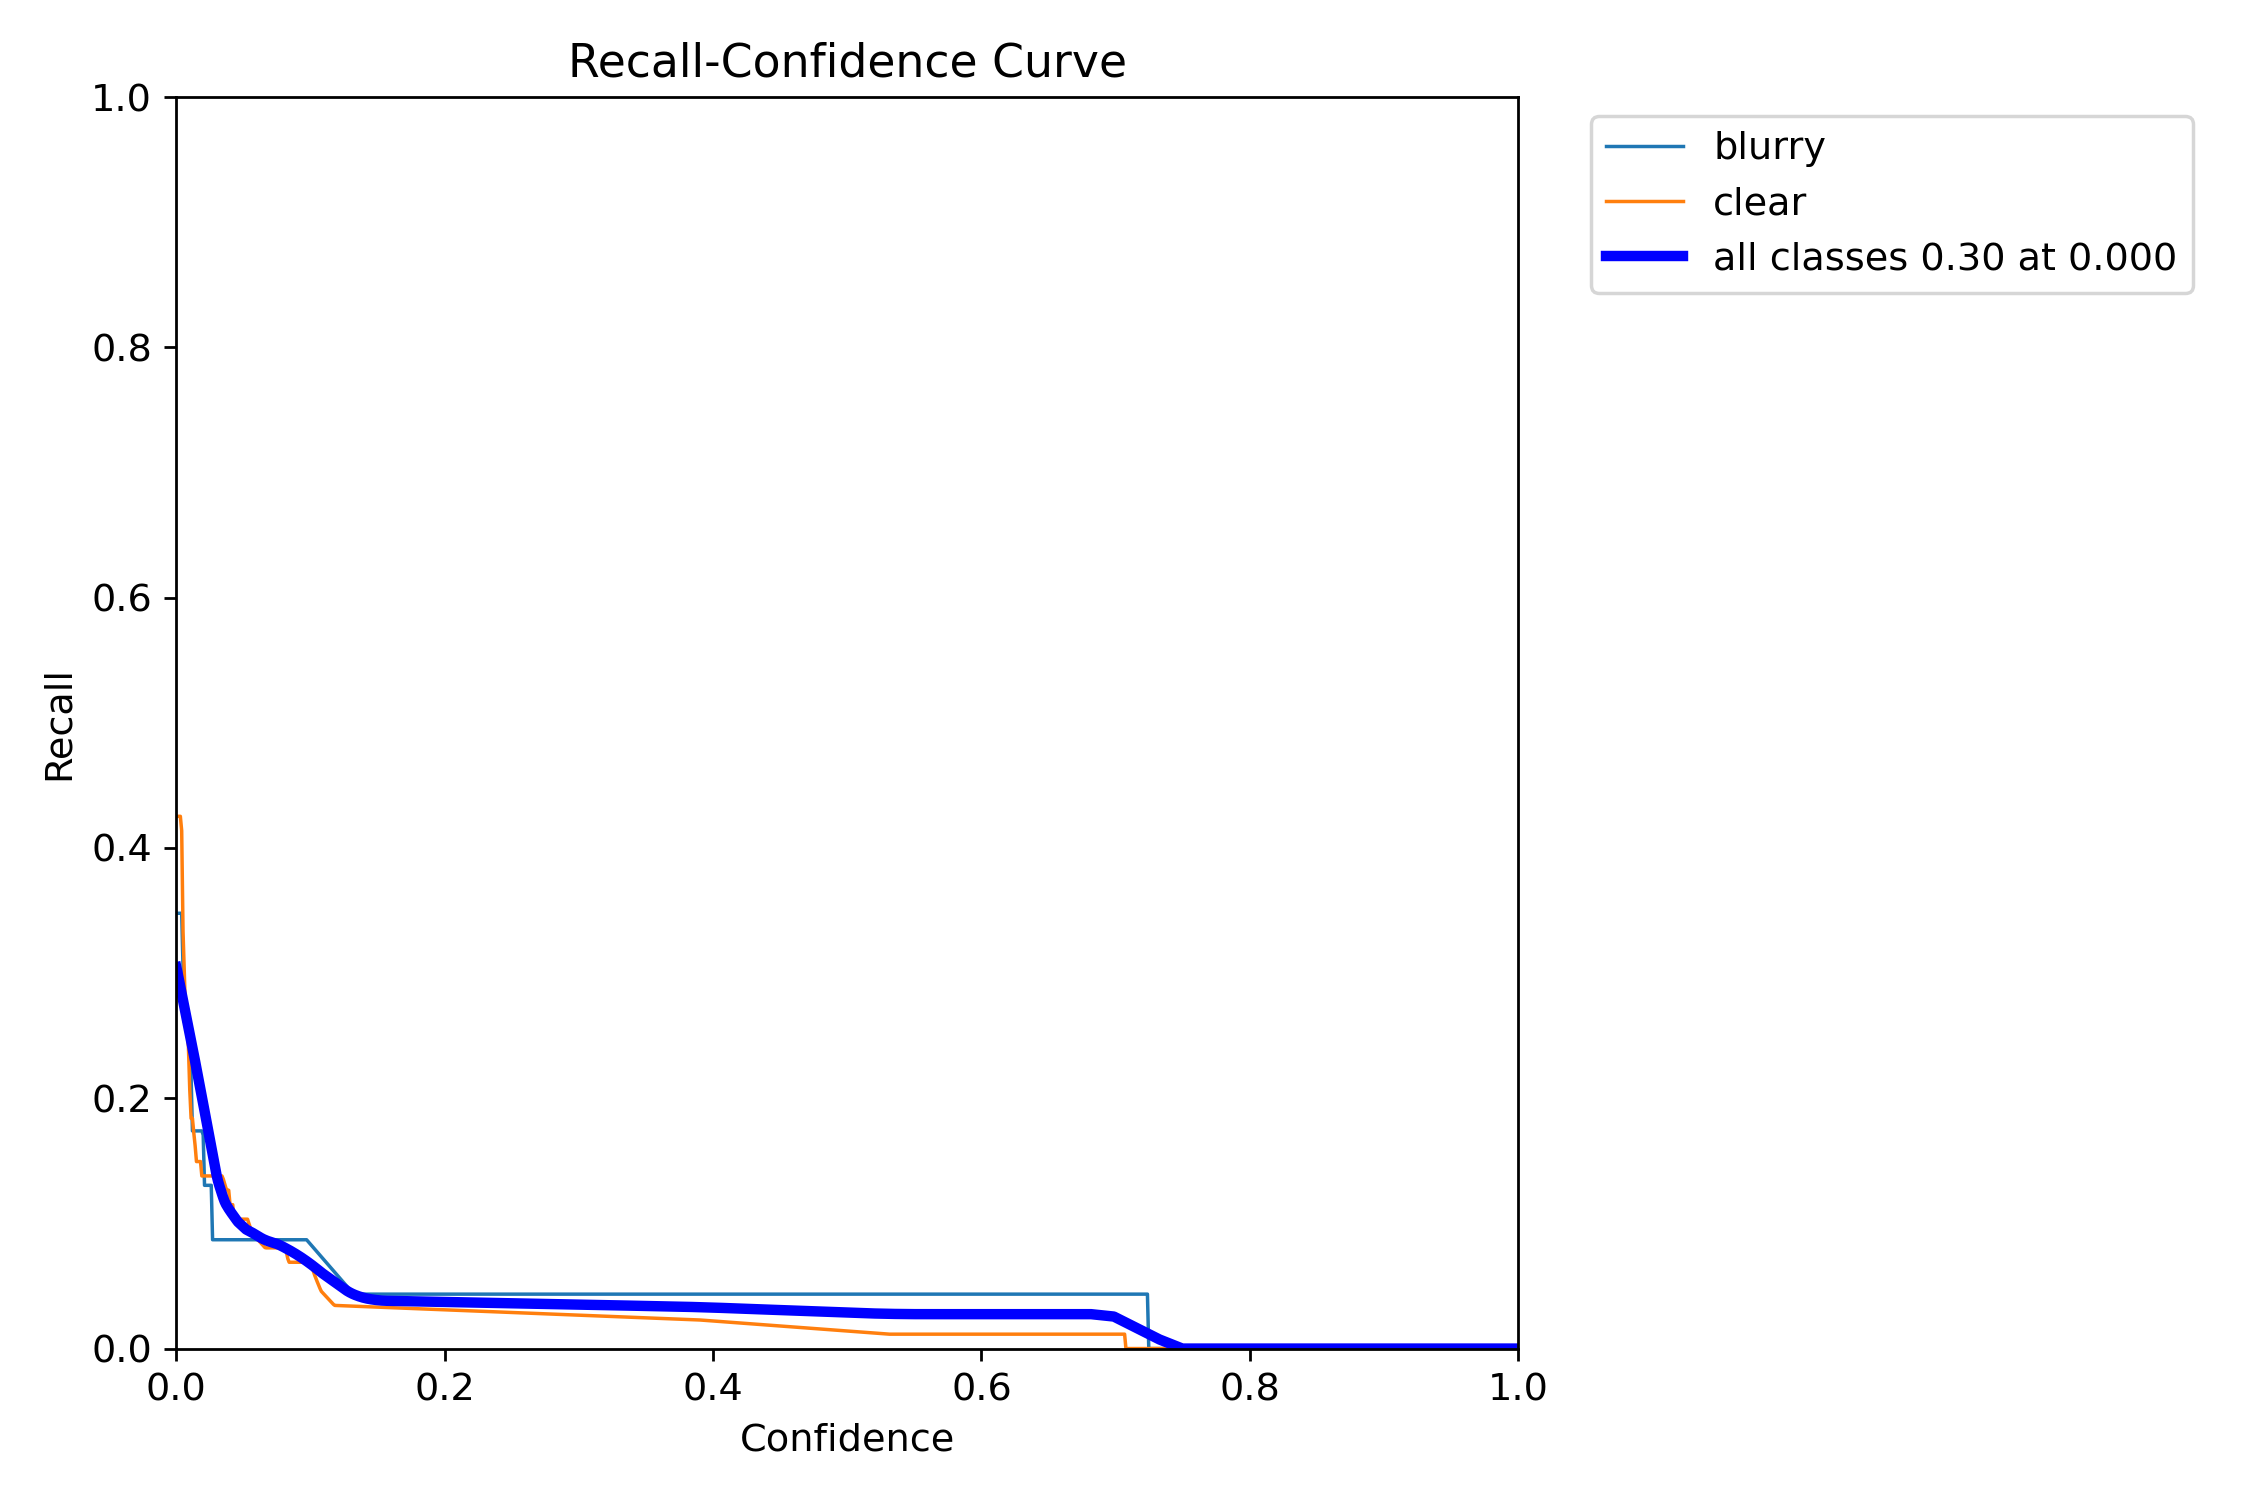

### Confusion Matrix Normalized

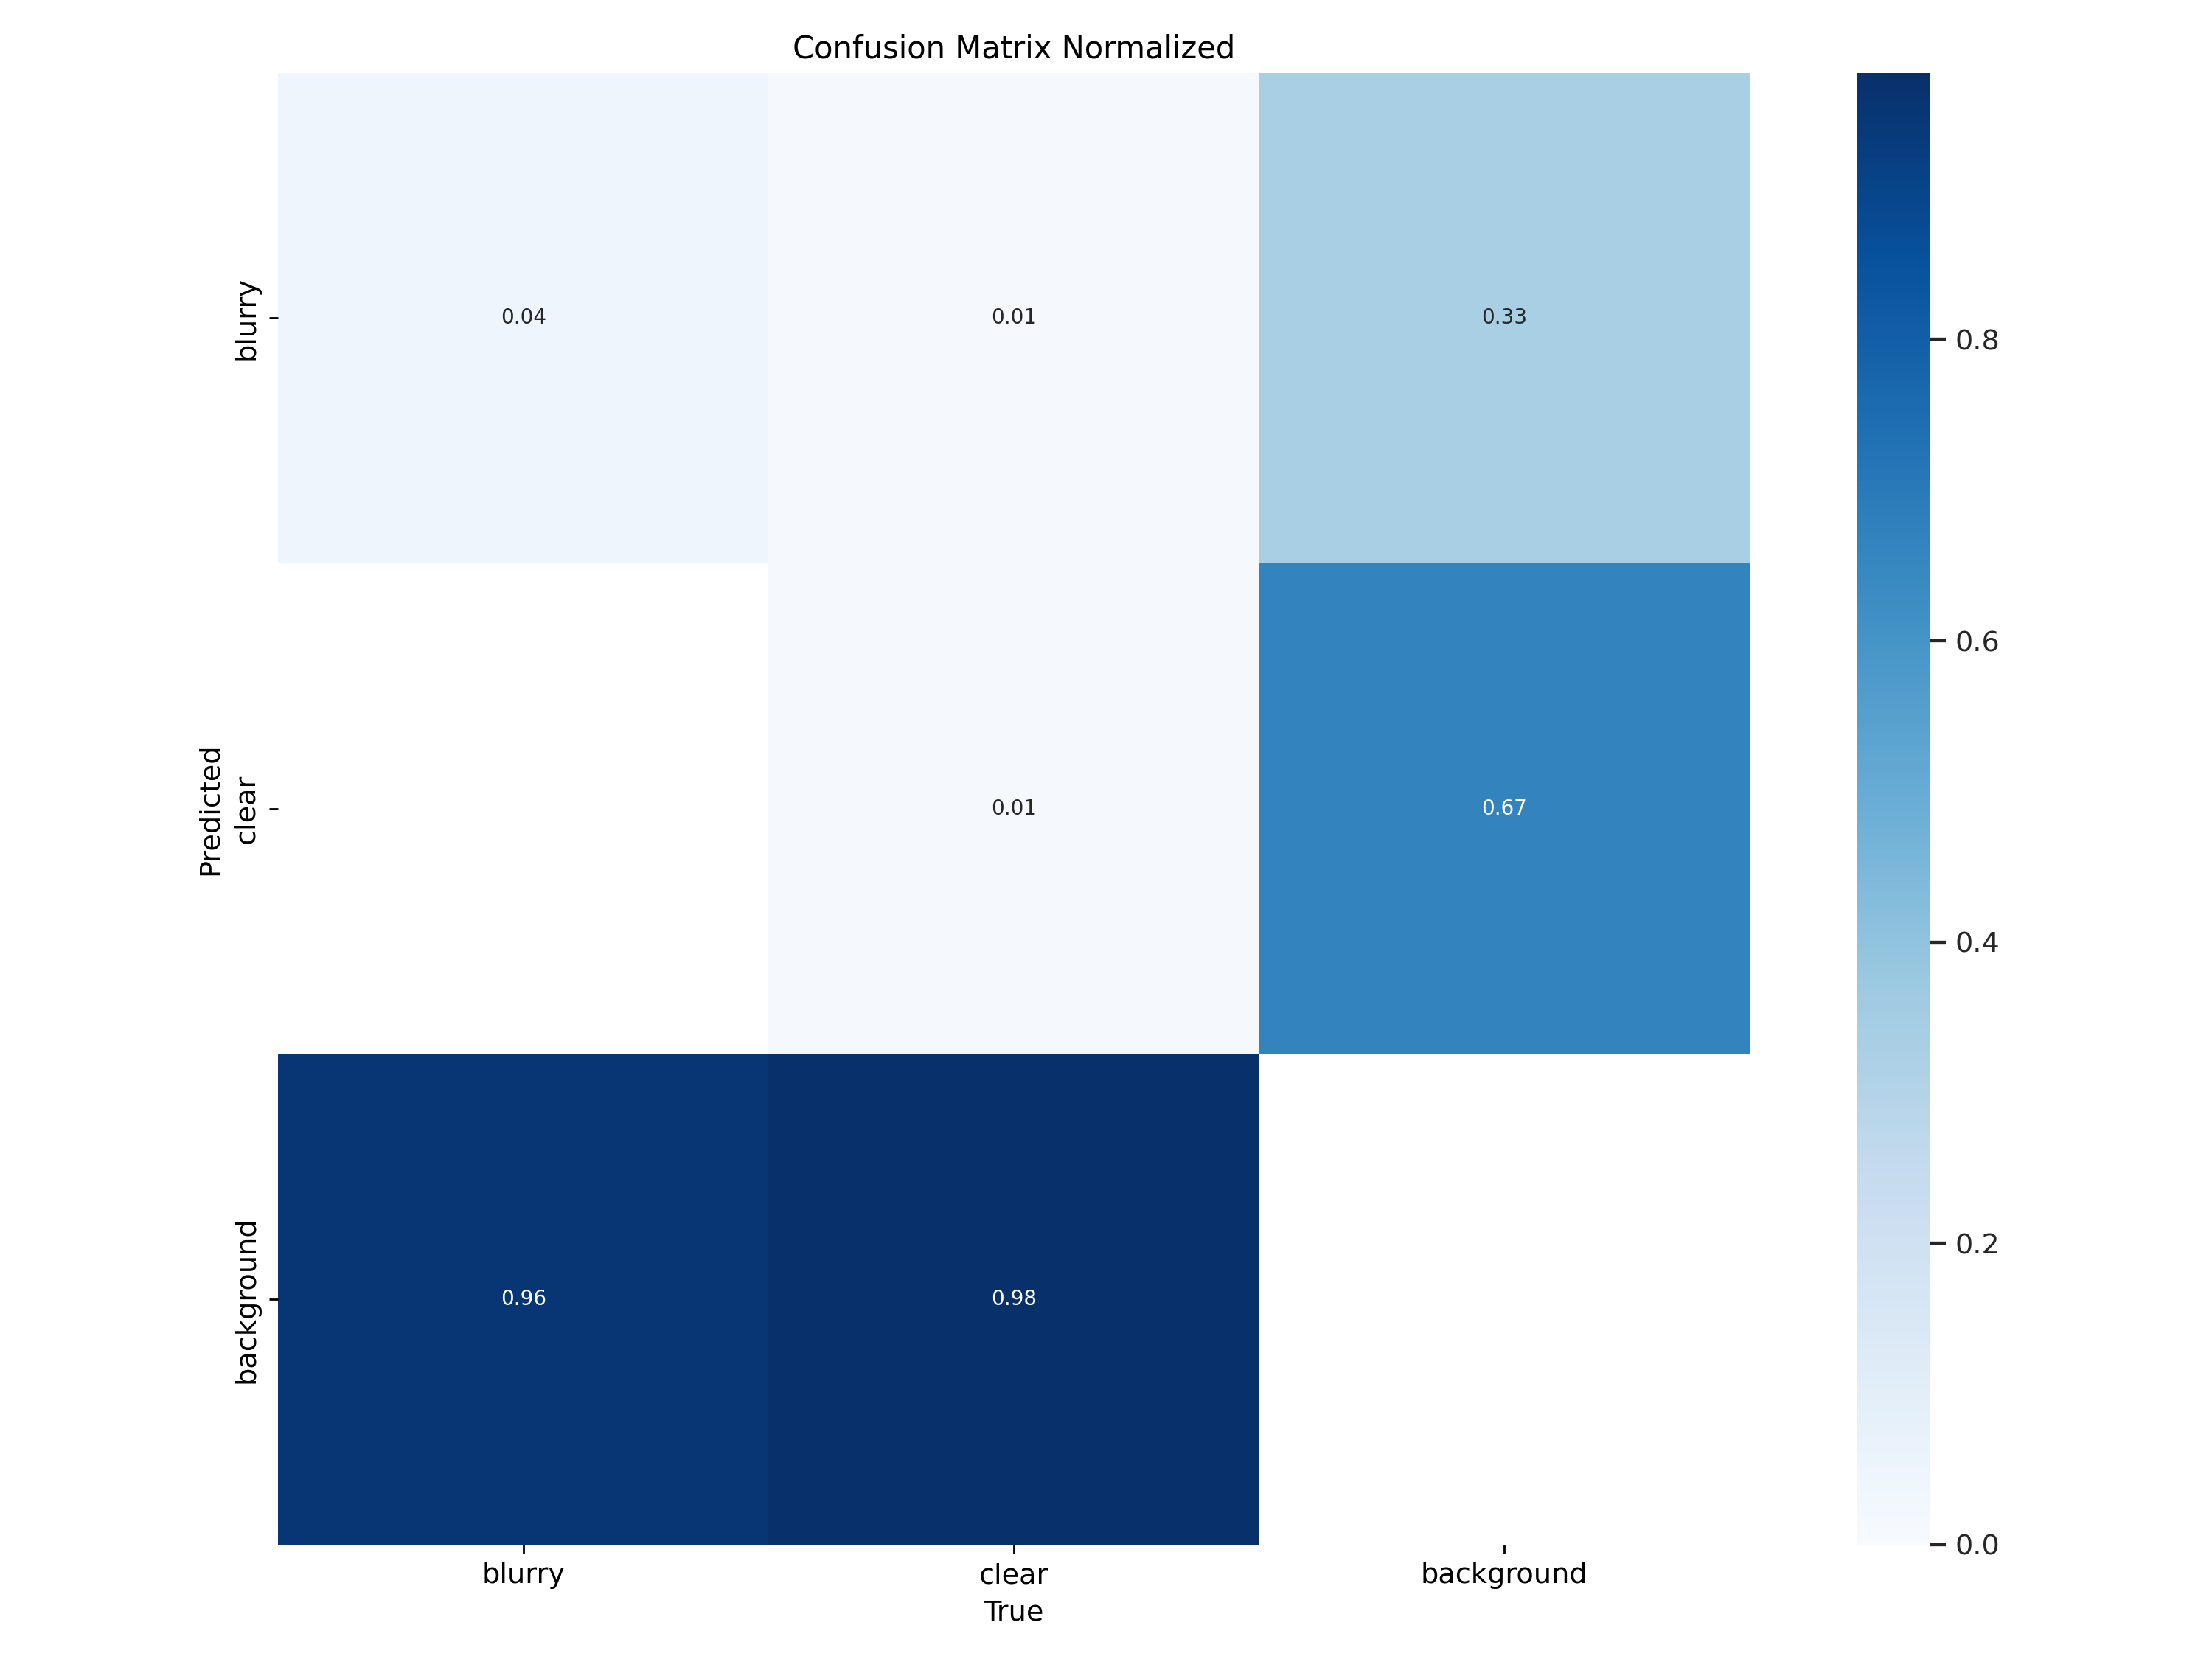

### labels and boxes

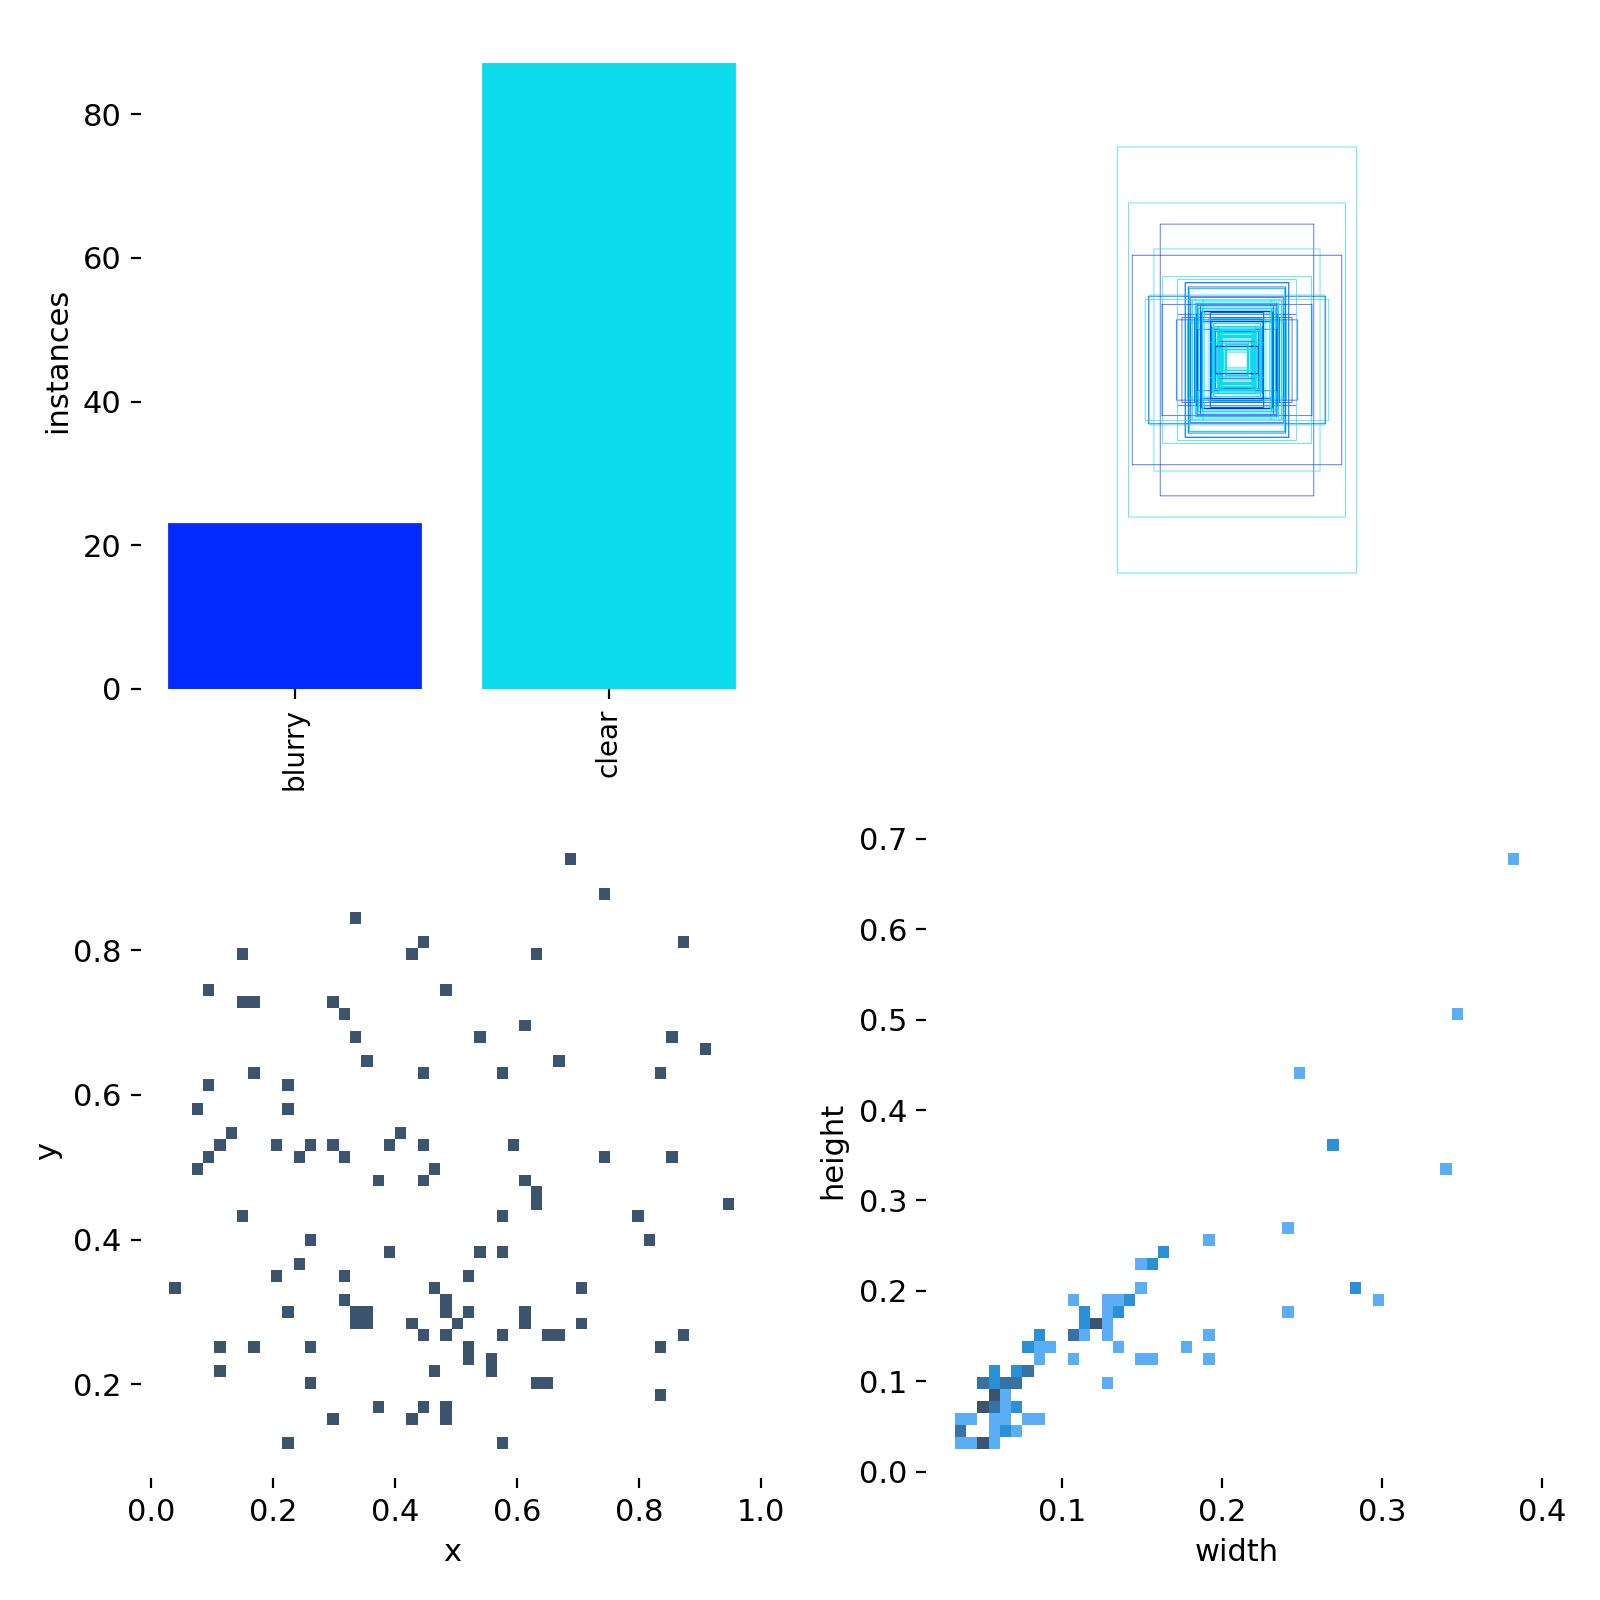

### losses and metrics

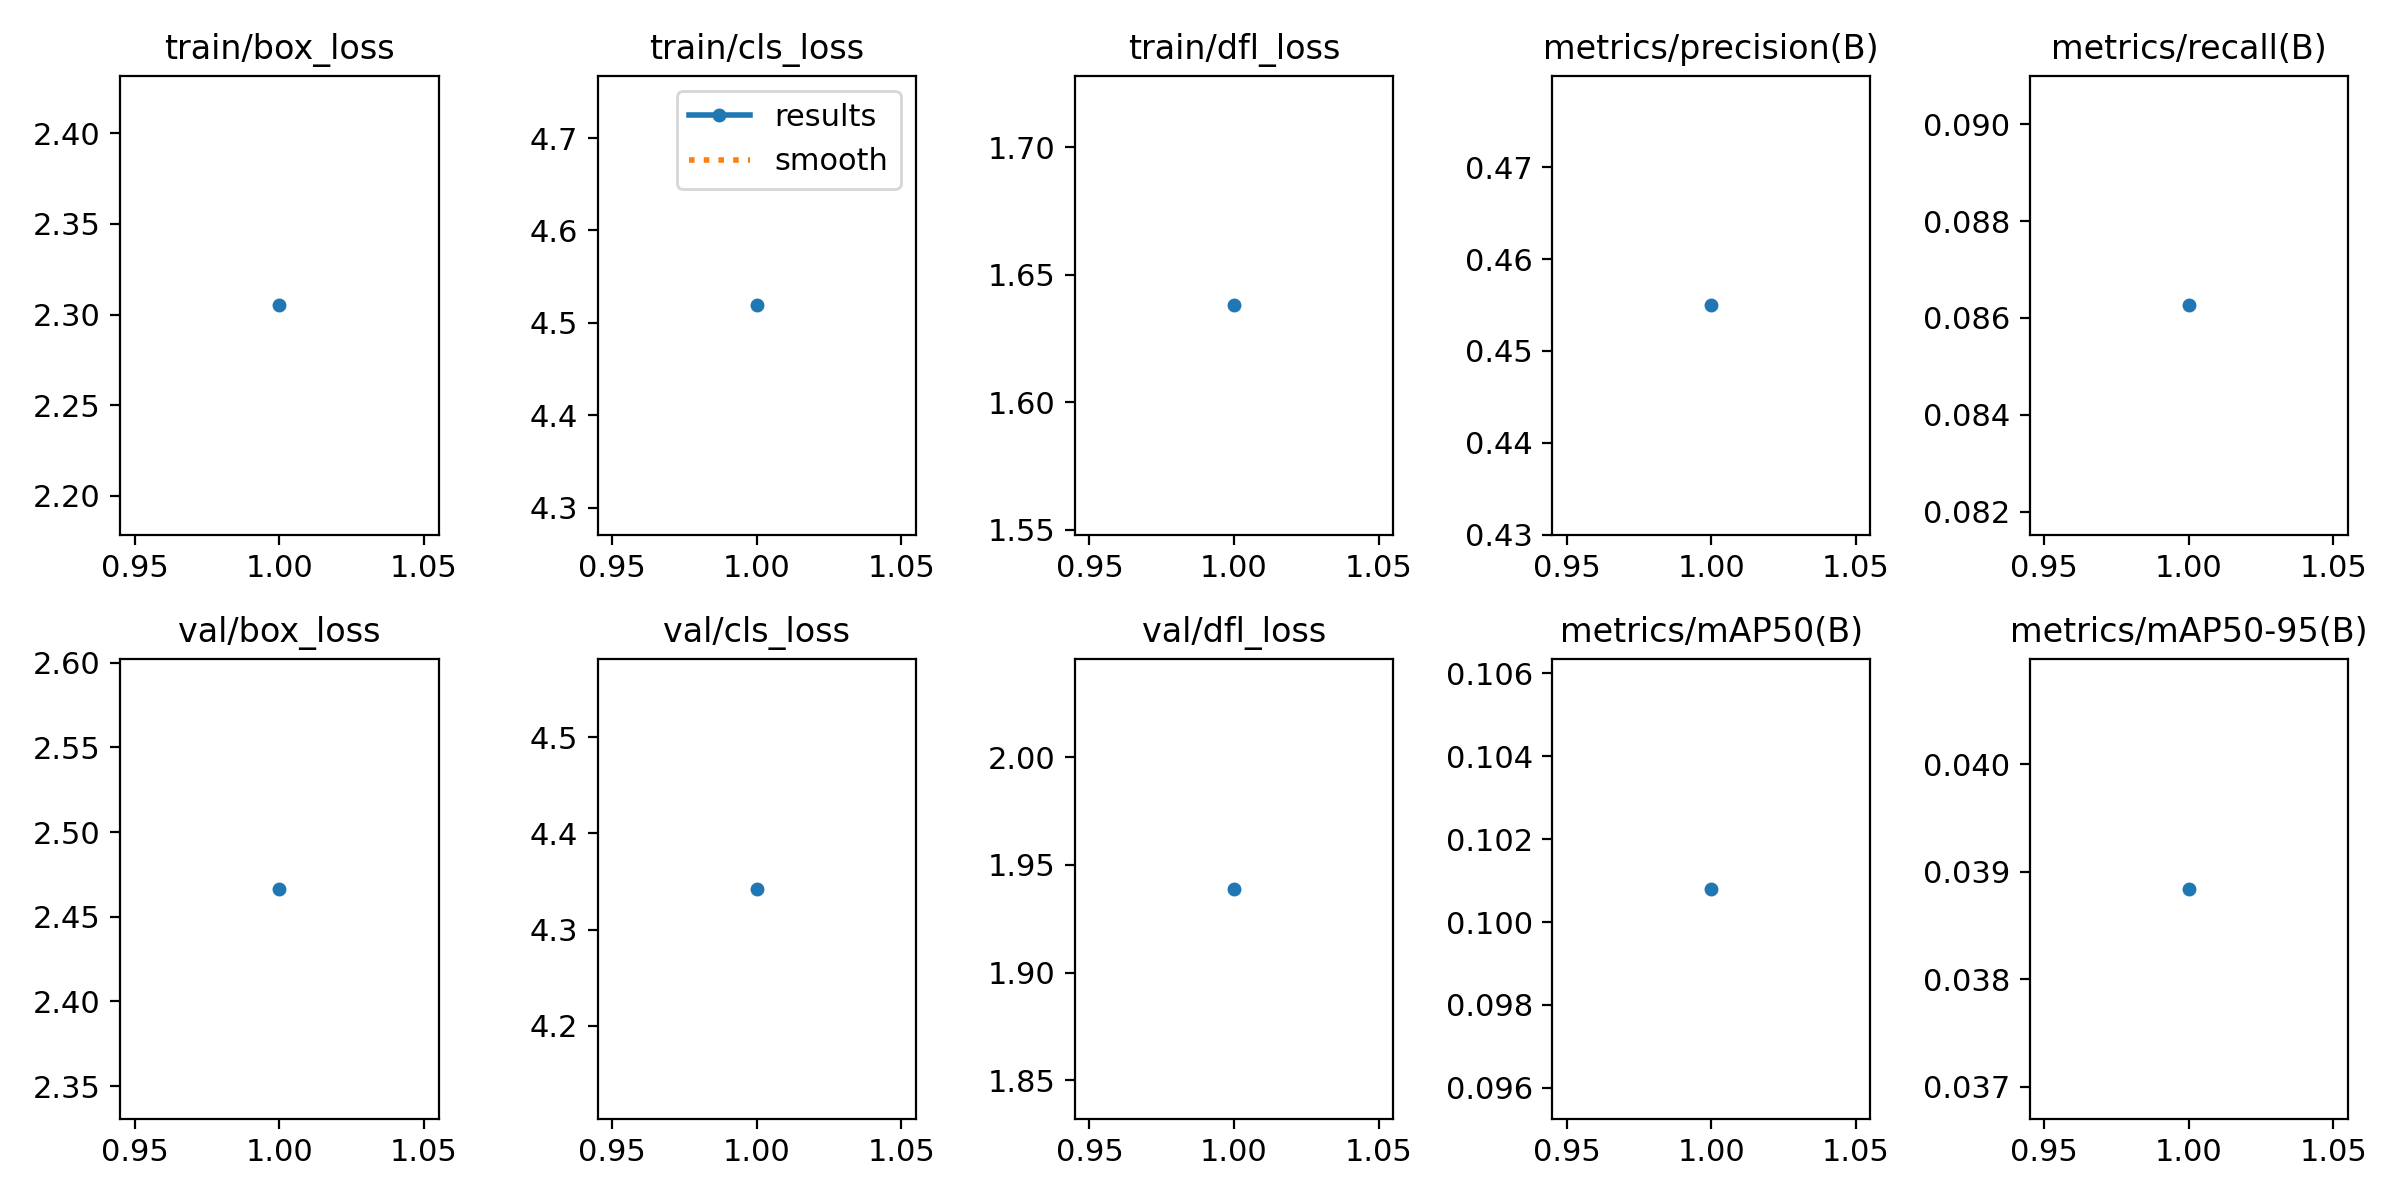

# 5) Improve results

## Hyperparameter Tuning


- Adjust Learning Rate: Experiment with lower or adaptive learning rates for gradual and stable convergence.

- Batch Size: Test different batch sizes to see if your model benefits from smaller or larger batches.

- Number of Epochs: Increase training epochs if the model hasn't fully converged (though CPU-only training will be slower).


## Model Architecture


- Use Larger Models: If hardware permits, train larger YOLO models (like yolov8m-face.pt or yolov8l-face.pt) instead of smaller ones (yolov8n-face.pt).

- Experiment with Pretrained Weights: Pretrained weights on related tasks (such as face detection) may accelerate training and improve accuracy.



## Fine-Tune Thresholds



- Blurriness Threshold: For Laplacian variance calculations, refine the threshold value for classifying faces as "blurry" or "clear" based on validation results.

- Confidence Threshold: Adjust the detection confidence threshold for predictions (default is often 0.25).


## Validation and Feedback


- Cross-Validation: Split the dataset into multiple folds for better evaluation and detection performance insights.

- Inspect Training Metrics: Regularly monitor metrics like precision, recall, mAP@0.5, and mAP@0.5:0.95 during training. Use these to identify bottlenecks.